# 비지도 학습
: Feature X는 있으나 Label y는 없는 데이터

### 비지도 학습을 사용하는 이유
- 알려지지 않은 패턴을 찾으려는 시도
- 범주화에 도움이 되는 특징과 패턴 알아내기
- 새로운 데이터에 대한 실시간 처리 가능
- 레이블되지 않은 데이터가 더 수집하기 쉬움

### 비지도 학습 알고리즘
- 군집(clustering)
    - 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 차원축소 등
- 이상치 탐지(outlier detection)
    - 비정상 데이터 감지
    - 결함 제품 감지, 시계열분석에서 새로운 트렌드 탐색 등
- 밀도 추정(density estimation)
    - 데이터셋 생성 확률 과정(random process)의 확률밀도함수 추정

### 알고리즘
1. k개 중심점(centroid)를 임의로 배치
2. 각 데이터를 가장 가까운 중심점에 소속
3. 군집의 새로운 중심점 계산
4. 반복하여 중심점의 이동이 적을 때 끝냄

## KMeans

### 장점과 단점
- 장점
    - 알고리즘이 쉽고 간결
- 단점
    - 속성의 개수가 많을 경우 정확도가 떨어짐
        - PCA 등의 차원축소로 보완
    - 반복 횟수가 많을 수록 수행 시간이 오래 걸림

### 파라미터
- n_cluster : 군집화할 개수, 군집 중심점의 개수
- init : 군집 중심점의 좌표를 설정할 방식, 일반적으로 k-means++ 사용
- max_iter : 최대 반복 횟수

### 학습 후
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 (shape : [군집 개수, 피처 개수]) - 시각화에 이용

## iris data

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

data = load_iris()
X = data.data
y = data.target
irisDF = pd.DataFrame(data=data.data, 
                      columns=['sepal_length','sepal_width','petal_length','petal_width'])

꽃잎의 너비와 길이에 대한 산점도

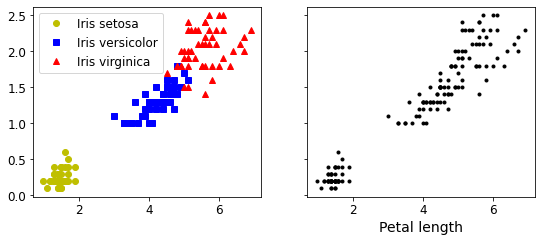

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], 'yo', label='Iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], 'bs', label='Iris versicolor')
plt.plot(X[y==2, 2], X[y==2, 3], 'r^', label='Iris virginica')
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c='k', marker='.')
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
irisDF['target'] = data.target
irisDF['cluster'] = kmeans.labels_ # 군집화 결과 데이터
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [5]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


### 시각화

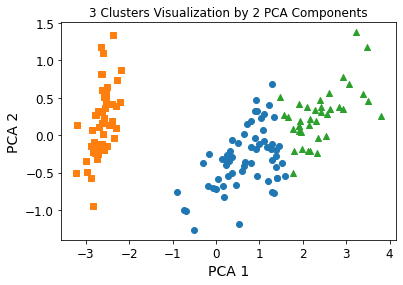

In [7]:
# 각 클러스터 인덱스
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# 인덱스의 pca_x, pca_y 산점도
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## 군집화 알고리즘 테스트

### make_blobs()
- n_samples : 생성할 총 데이터 수
- n_features : 데이터의 피쳐 개수
- centers : int로 주면 군집의 개수, ndarray로 주면 각 군집 중심점의 좌표
- cluster_std : 생성될 군집 데이터의 표준편차, int 또는 ndarray로 설정

In [8]:
from sklearn.datasets import make_blobs
import numpy as np

# 군집이 3개, 피쳐가 2개, 분산이 0.8인 200개의 샘플 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=0)

In [9]:
# y target 값의 분포
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


### 시각화

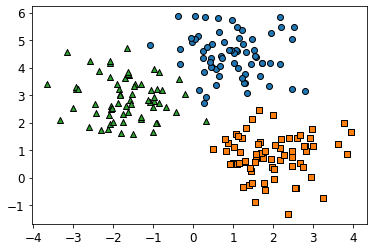

In [11]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
               edgecolor='k', marker=markers[target])
plt.show()

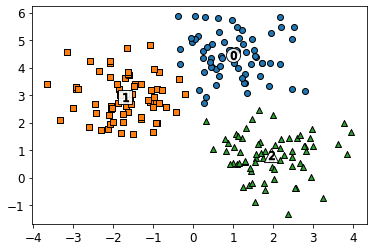

In [12]:
# KMeans++ 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [13]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [14]:
# clusterDF.groupby(['target', 'kmeans_label']).size()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
dtype: int64

### 분산별 시각화

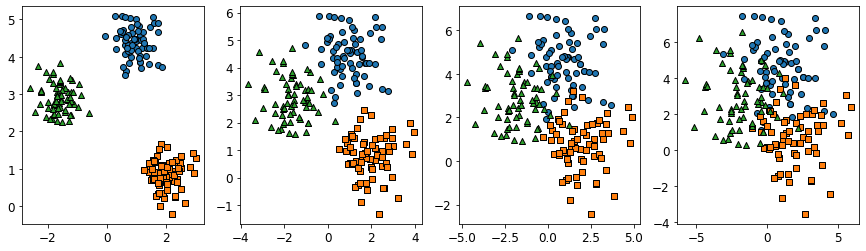

In [20]:
stds = [0.4, 0.8, 1.2, 1.6]

fig, axs = plt.subplots(figsize=(15, 4), ncols=4, nrows=1)

for i, std in enumerate(stds):
    X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                     cluster_std=std, random_state=0)
    
    clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    clusterDF['target'] = y
    
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target']==target]
        axs[i].scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
               edgecolor='k', marker=markers[target])
plt.show()